# An√°lise de Dados ‚Äî Teste T√©cnico
Este projeto foi desenvolvido como parte do processo seletivo para o programa de trainee da Triggo.ai. O objetivo √© realizar uma an√°lise explorat√≥ria e descritiva dos dados, respondendo a quest√µes de neg√≥cio.

Al√©m da etapa explorat√≥ria, ser√£o implementados dois modelos de Machine Learning:
* Predi√ß√£o de Atraso na Entrega: modelo supervisionado de classifica√ß√£o para prever se um pedido ser√° entregue com atraso.
* Segmenta√ß√£o de Clientes: modelo de clusteriza√ß√£o para identificar grupos de clientes com comportamentos semelhantes e propor estrat√©gias espec√≠ficas para cada segmento.

O projeto est√° estruturado nas seguintes etapas:
* Prepara√ß√£o dos Dados
* An√°lise Explorat√≥ria
* Resolu√ß√£o de Problemas de Neg√≥cio
* Modelagem Preditiva e de Clusteriza√ß√£o
* Visualiza√ß√µes e Dashboards

In [2]:
# importa√ß√£o das bibliotecas necess√°rias √† primeira etapa do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importando os dados
import os
pasta = './data'

for arquivo in os.listdir(pasta):
    if arquivo.endswith('.csv'):
        nome_var = arquivo.replace('.csv', '').lower().replace(' ', '_')
        caminho = os.path.join(pasta, arquivo)
        globals()[nome_var] = pd.read_csv(caminho)

# Vamos listar os nomes das vari√°veis criadas:
vars_criadas = [arquivo.replace('.csv', '').lower().replace(' ', '_') for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]
print("Vari√°veis criadas:")
for var in vars_criadas:
    print(f"- {var}")

Vari√°veis criadas:
- olist_customers_dataset
- olist_geolocation_dataset
- olist_orders_dataset
- olist_order_items_dataset
- olist_order_payments_dataset
- olist_order_reviews_dataset
- olist_products_dataset
- olist_sellers_dataset
- product_category_name_translation


In [6]:
olist_customers_dataset.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [8]:
olist_geolocation_dataset.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [10]:
olist_orders_dataset.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [12]:
olist_order_items_dataset.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [14]:
olist_order_payments_dataset.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [16]:
olist_order_reviews_dataset.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parab√©ns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [18]:
olist_products_dataset.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [20]:
olist_sellers_dataset.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [22]:
product_category_name_translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [24]:
#checar por valores nulos
product_category_name_translation.info()
olist_products_dataset.info()
olist_customers_dataset.info()
olist_geolocation_dataset.info()
olist_orders_dataset.info()
olist_order_items_dataset.info()
olist_order_payments_dataset.info()
olist_order_reviews_dataset.info()
olist_sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 

Temos valores nulos para as tabelas:
* olist_products_dataset
* olist_orders_dataset
* olist_order_reviews_dataset

Podemos apagar as linhas com valores nulos para prosseguir com a nossa an√°lise.

In [27]:
# Para o DataFrame olist_products_dataset
olist_products_dataset = olist_products_dataset.dropna()

# Para o DataFrame olist_orders_dataset
olist_orders_dataset = olist_orders_dataset.dropna()

# Para o DataFrame olist_order_reviews_dataset
olist_order_reviews_dataset = olist_order_reviews_dataset.dropna()

In [29]:
#checando as tabelas limpas
olist_products_dataset.info()
olist_orders_dataset.info()
olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----

## Modelo Relacional
- `olist_orders_dataset` ‚Üí `olist_order_items_dataset` : via `order_id`
- `olist_order_items_dataset` ‚Üí `olist_products_dataset` : via `product_id`
- `olist_products_dataset` ‚Üí `product_category_name_translation` : via `product_category_name`
- `olist_orders_dataset` ‚Üí `olist_order_reviews_dataset` : via `order_id`
- `olist_orders_dataset` ‚Üí `olist_order_payments_dataset` : via `order_id`
- `olist_orders_dataset` ‚Üí `olist_customers_dataset` : via `customer_id`
- `olist_customers_dataset` ‚Üí `olist_geolocation_dataset` : via `customer_zip_code_prefix` (n√£o √© rela√ß√£o 1 pra 1, mas d√° pra cruzar)

In [32]:
# Come√ßando pela orders, que √© a tabela central
df_main = olist_orders_dataset.copy()

# Juntando com os customers
df_main = df_main.merge(olist_customers_dataset, on='customer_id', how='left')

# Juntando com os order items
df_main = df_main.merge(olist_order_items_dataset, on='order_id', how='left')

# Juntando com os products
df_main = df_main.merge(olist_products_dataset, on='product_id', how='left')

# Juntando com os sellers
df_main = df_main.merge(olist_sellers_dataset, on='seller_id', how='left')

# Juntando com os payments
df_main = df_main.merge(olist_order_payments_dataset, on='order_id', how='left')

# Juntando com as reviews
df_main = df_main.merge(olist_order_reviews_dataset, on='order_id', how='left')

# Juntando com as categorias traduzidas
df_main = df_main.merge(product_category_name_translation, on='product_category_name', how='left')

# Geolocation n√£o tem uma chave direta com orders ‚Äî normalmente √© usado separado via cep ou cidade, ent√£o deixa de fora por enquanto
# Resultado
print(df_main.shape)
df_main.head()

(115033, 40)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
2           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
3           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
4           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix  ... payment_type payment_installments  \
0                      3149  ...  credit_card                  1.0   
1                      3149  ...      voucher                  1.0   
2                      3149  ...      voucher                  1.0   
3                     47813  ...       boleto                  1.0   
4                     75265  ...  credit_card                  3.0   

   payment_value                         review_id review_score  \
0          18.12                               NaN          NaN   
1           2.00                               NaN          NaN   
2          18.59                               NaN          NaN   
3         141.46  8d5266042046a06655c8db133d120ba5          4.0   
4         179.12                               NaN          NaN   

  review_comment_title  review_comment_message  review_creation_date  \
0                  NaN                     NaN                   NaN   
1                  NaN                     NaN                   NaN   
2                  NaN                     NaN                   NaN   
3     Muito boa a loja    Muito bom o produto.   2018-08-08 00:00:00   
4                  NaN                     NaN                   NaN   

  review_answer_timestamp  product_category_name_english  
0                     NaN                     housewares  
1                     NaN                     housewares  
2                     NaN                     housewares  
3     2018-08-08 18:37:50                      perfumery  
4                     NaN                           auto  

[5 rows x 40 columns]

In [34]:
#checando novamente por valores nulos
df = df_main
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115033 entries, 0 to 115032
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115033 non-null  object 
 1   customer_id                    115033 non-null  object 
 2   order_status                   115033 non-null  object 
 3   order_purchase_timestamp       115033 non-null  object 
 4   order_approved_at              115033 non-null  object 
 5   order_delivered_carrier_date   115033 non-null  object 
 6   order_delivered_customer_date  115033 non-null  object 
 7   order_estimated_delivery_date  115033 non-null  object 
 8   customer_unique_id             115033 non-null  object 
 9   customer_zip_code_prefix       115033 non-null  int64  
 10  customer_city                  115033 non-null  object 
 11  customer_state                 115033 non-null  object 
 12  order_item_id                 

In [36]:
#compreendendo quantas linhas s√£o afetadas com valores nulos
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1628
product_name_lenght                1628
product_description_lenght         1628
product_photos_qty                 1628
product_weight_g                   1628
product_length_cm                  1628
product_height_cm                  1628


As colunas com 103381 valores nulos s√£o referentes a avalia√ß√µes, podemos deix√°-las assim sem preju√≠zo em nossa an√°lise. <br>
As colunas com 1628 valores nulos se referem a atributos de produto. J√° que o volume de nulos n√£o √© t√£o grande, e peso/dimens√µes s√£o importantes para an√°lise e ML, o mais pr√°tico e seguro √© dropar essas linhas para garantir qualidade dos dados <br>.
As 3 nulas em payment_* s√£o triviais, podem ser dropadas direto sem problema.

In [39]:
# 1Ô∏è‚É£ Dropar as 3 linhas com nulo em qualquer coluna de pagamento
df = df.dropna(subset=['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'])

# 2Ô∏è‚É£ Deixar review_* quietinho

# 3Ô∏è‚É£ Dropar as linhas com nulo em colunas de produto
cols_produto = [
    'product_category_name', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm', 'product_category_name_english'
]

df = df.dropna(subset=cols_produto)

# 4Ô∏è‚É£ Confirmar quantos nulos sobraram (spoiler: s√≥ nos review_*)
print(df.isnull().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      0
product_length_cm                     0
product_height_cm                     0


### Checando por valores duplicados

In [42]:
#Checando duplicatas
print(df.duplicated().sum())

0


## Checando por incosist√™ncias nos tipos de dados de cada coluna

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113379 entries, 0 to 115032
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113379 non-null  object 
 1   customer_id                    113379 non-null  object 
 2   order_status                   113379 non-null  object 
 3   order_purchase_timestamp       113379 non-null  object 
 4   order_approved_at              113379 non-null  object 
 5   order_delivered_carrier_date   113379 non-null  object 
 6   order_delivered_customer_date  113379 non-null  object 
 7   order_estimated_delivery_date  113379 non-null  object 
 8   customer_unique_id             113379 non-null  object 
 9   customer_zip_code_prefix       113379 non-null  int64  
 10  customer_city                  113379 non-null  object 
 11  customer_state                 113379 non-null  object 
 12  order_item_id                  1133

Para come√ßar vamos checar os campos onde deveriam haver apenas datas.

In [143]:
data_columns = [
    'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date',
    'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'
]

for col in data_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [145]:
#vamos checar quantos valores que n√£o eram data haviam
for col in data_columns:
    print(f"{col}: {df[col].isna().sum()} valores inv√°lidos")

order_purchase_timestamp: 0 valores inv√°lidos
order_approved_at: 0 valores inv√°lidos
order_delivered_carrier_date: 0 valores inv√°lidos
order_delivered_customer_date: 0 valores inv√°lidos
order_estimated_delivery_date: 0 valores inv√°lidos
shipping_limit_date: 0 valores inv√°lidos
review_creation_date: 101801 valores inv√°lidos
review_answer_timestamp: 101801 valores inv√°lidos


Agora vamos checar a coluna de status do pedido, para checar por valores inv√°lidos.

In [64]:
df['order_status'].value_counts()

order_status
delivered    113372
canceled          7
Name: count, dtype: int64

# An√°lise Explorat√≥ria: respondendo √†s perguntas
* a) Qual o volume de pedidos por m√™s? Existe sazonalidade nas vendas?
* b) Qual a distribui√ß√£o do tempo de entrega dos pedidos?
* c) Qual a rela√ß√£o entre o valor do frete e a dist√¢ncia de entrega?
* d) Quais s√£o as categorias de produtos mais vendidas em termos de faturamento? <br>
* e) Quais estados brasileiros possuem o maior valor m√©dio de pedido? <br>

---------------

O enunciado pede Python e SQL para as repostas, ent√£o usaremos `pandasql` para as consultas em nosso conjunto de dados <br>

In [67]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import pandasql as ps

### a) Qual o volume de pedidos por m√™s? Existe sazonalidade nas vendas?

In [70]:
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

query_a = """
SELECT 
    strftime('%Y-%m', order_purchase_timestamp) AS mes,
    COUNT(order_id) AS total_pedidos
FROM olist_orders_dataset
GROUP BY 1
ORDER BY 1
"""

pedidos_por_mes_sql = pysqldf(query_a)
print(pedidos_por_mes_sql)

        mes  total_pedidos
0   2016-09              1
1   2016-10            270
2   2016-12              1
3   2017-01            748
4   2017-02           1641
5   2017-03           2546
6   2017-04           2303
7   2017-05           3545
8   2017-06           3135
9   2017-07           3872
10  2017-08           4193
11  2017-09           4149
12  2017-10           4478
13  2017-11           7288
14  2017-12           5513
15  2018-01           7069
16  2018-02           6556
17  2018-03           7003
18  2018-04           6798
19  2018-05           6749
20  2018-06           6096
21  2018-07           6156
22  2018-08           6351


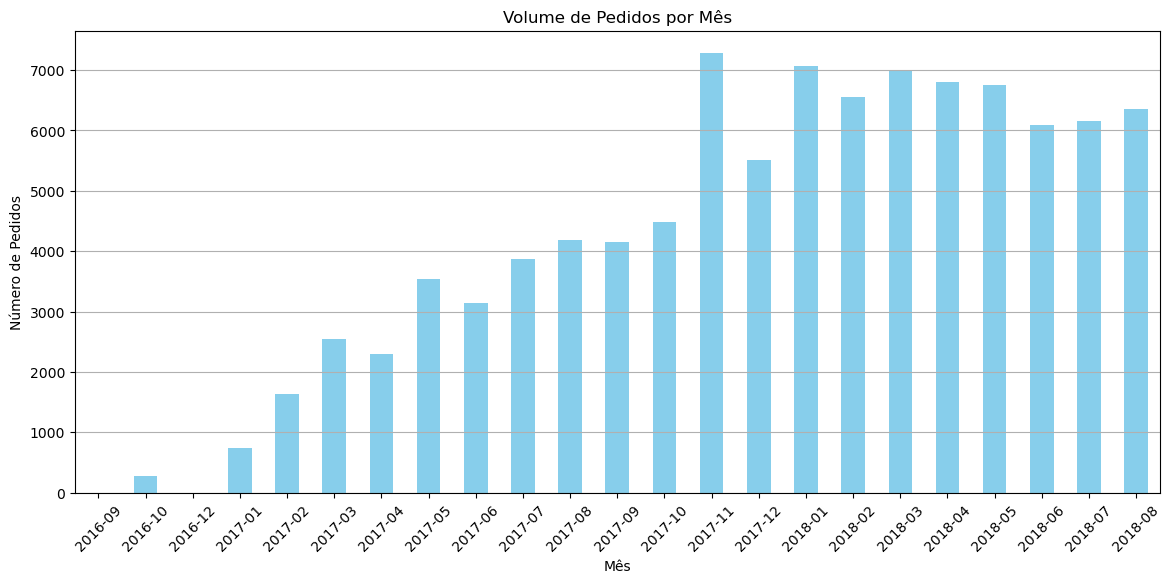

In [71]:
# Converter para datetime
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])

# Agrupar pedidos por m√™s
pedidos_por_mes = olist_orders_dataset.groupby(olist_orders_dataset['order_purchase_timestamp'].dt.to_period('M')).order_id.count()

# Plotar o gr√°fico
plt.figure(figsize=(14,6))
pedidos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Volume de Pedidos por M√™s')
plt.xlabel('M√™s')
plt.ylabel('N√∫mero de Pedidos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

O volume de vendas aumenta com o tempo, mas n√£o apresenta sazonalidade

### b) Qual a distribui√ß√£o do tempo de entrega dos pedidos?

In [77]:
query = """
SELECT 
    julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) AS tempo_entrega
FROM olist_orders_dataset
WHERE order_delivered_customer_date IS NOT NULL
"""

tempo_entrega_sql = ps.sqldf(query, locals())
print(tempo_entrega_sql.head())

   tempo_entrega
0       8.436574
1      13.782037
2       9.394213
3      13.208750
4       2.873877


count    96461.000000
mean        12.093582
std          9.551576
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time_days, dtype: float64


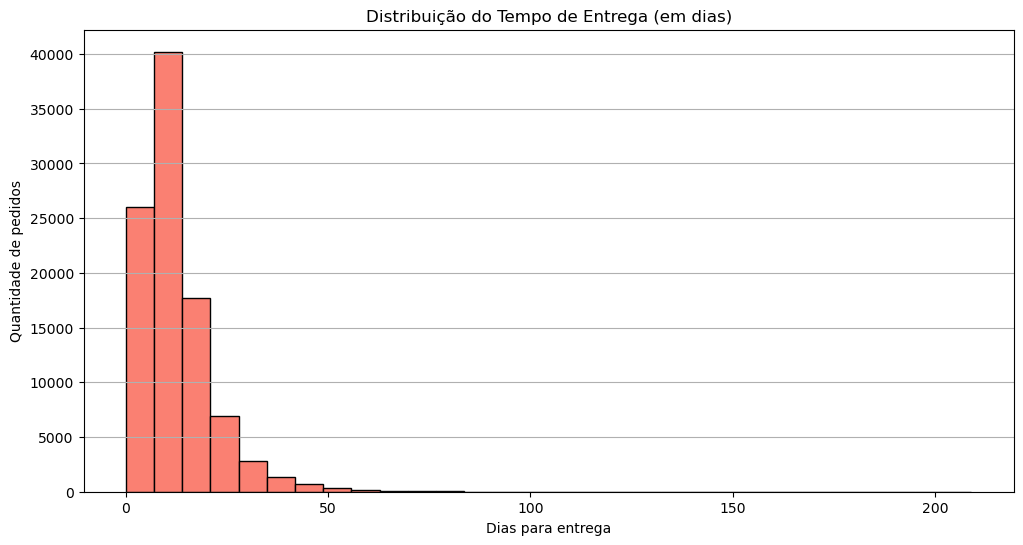

In [79]:
# Converter colunas para datetime (se ainda n√£o estiver)
olist_orders_dataset['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_customer_date'])
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])

# Calcular o tempo de entrega em dias
olist_orders_dataset['delivery_time_days'] = (olist_orders_dataset['order_delivered_customer_date'] - olist_orders_dataset['order_purchase_timestamp']).dt.days

# Visualizar estat√≠sticas b√°sicas
print(olist_orders_dataset['delivery_time_days'].describe())

# Plotar histograma
plt.figure(figsize=(12,6))
plt.hist(olist_orders_dataset['delivery_time_days'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribui√ß√£o do Tempo de Entrega (em dias)')
plt.xlabel('Dias para entrega')
plt.ylabel('Quantidade de pedidos')
plt.grid(axis='y')
plt.show()

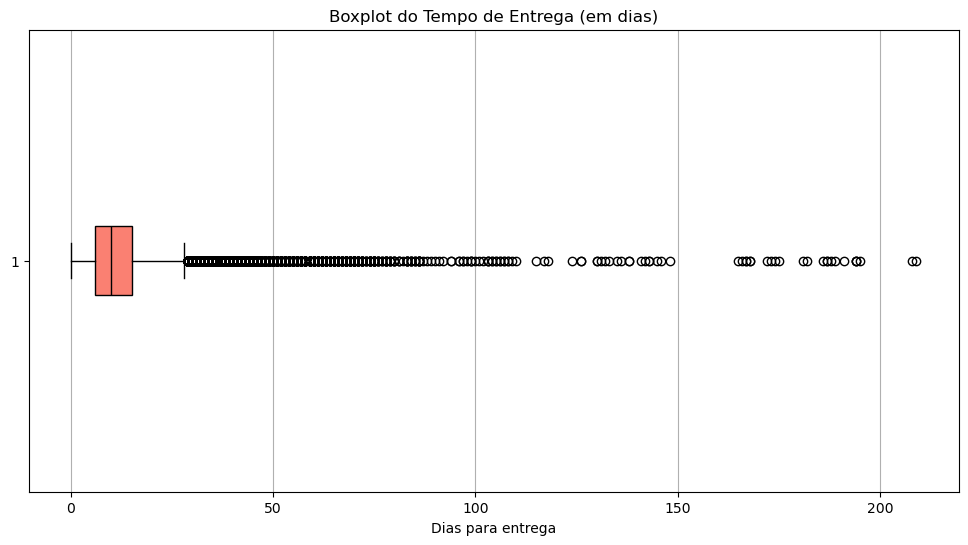

In [81]:
# Criar boxplot
plt.figure(figsize=(12,6))
plt.boxplot(olist_orders_dataset['delivery_time_days'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='salmon', edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
plt.title('Boxplot do Tempo de Entrega (em dias)')
plt.xlabel('Dias para entrega')
plt.grid(axis='x')
plt.show()

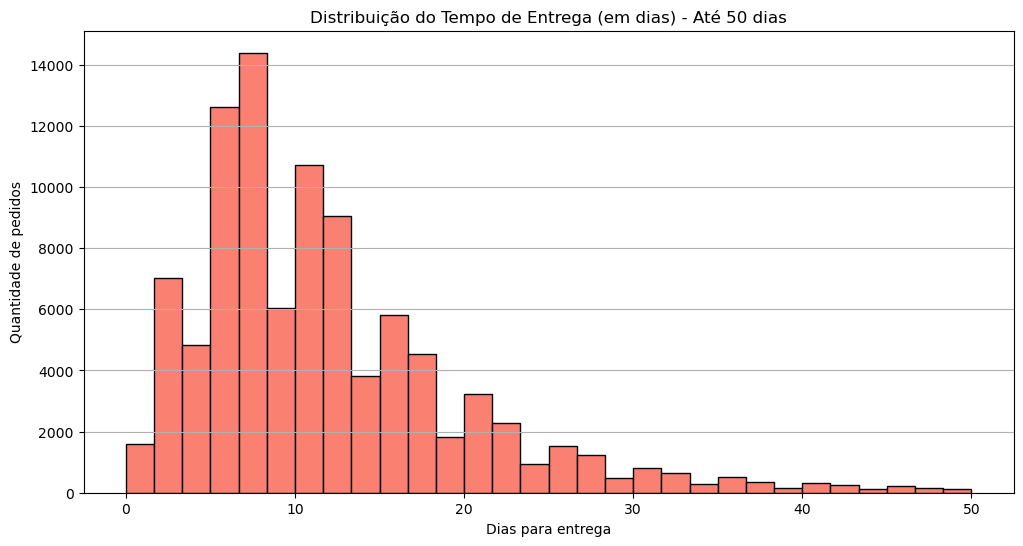

In [83]:
# Filtrar valores menores ou iguais a 50 dias
filtered_delivery_time = olist_orders_dataset['delivery_time_days'][olist_orders_dataset['delivery_time_days'] <= 50]

# Plotar histograma
plt.figure(figsize=(12,6))
plt.hist(filtered_delivery_time.dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribui√ß√£o do Tempo de Entrega (em dias) - At√© 50 dias')
plt.xlabel('Dias para entrega')
plt.ylabel('Quantidade de pedidos')
plt.grid(axis='y')
plt.show()

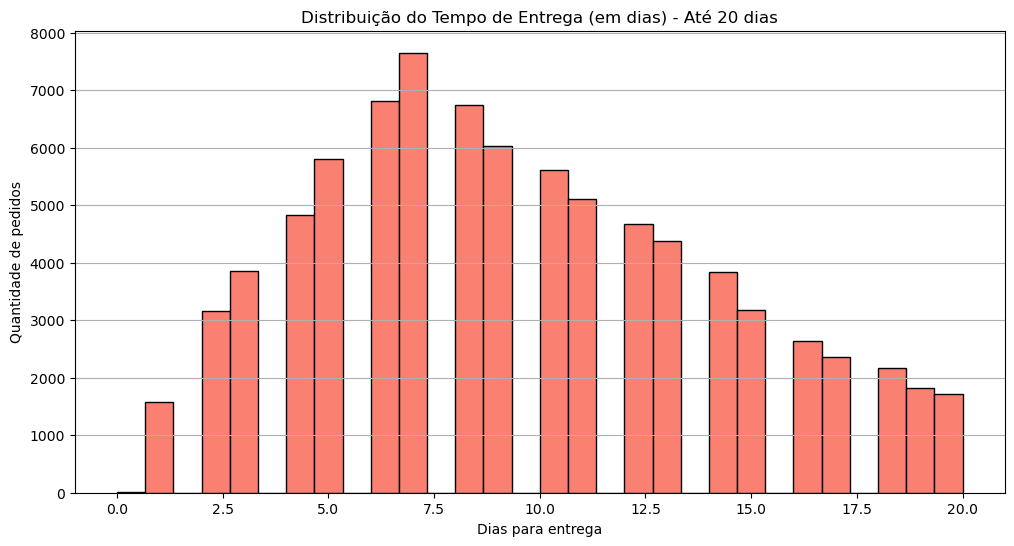

In [85]:
# Filtrar valores menores ou iguais a 50 dias
filtered_delivery_time = olist_orders_dataset['delivery_time_days'][olist_orders_dataset['delivery_time_days'] <= 20]

# Plotar histograma
plt.figure(figsize=(12,6))
plt.hist(filtered_delivery_time.dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribui√ß√£o do Tempo de Entrega (em dias) - At√© 20 dias')
plt.xlabel('Dias para entrega')
plt.ylabel('Quantidade de pedidos')
plt.grid(axis='y')
plt.show()

Temos muitos outliers, mas a maior parte dos pedidos √© entregue entre 6 e 7 dias

### c) Qual a rela√ß√£o entre o valor do frete e a dist√¢ncia de entrega?

Correla√ß√£o entre valor do frete e dist√¢ncia: 0.41


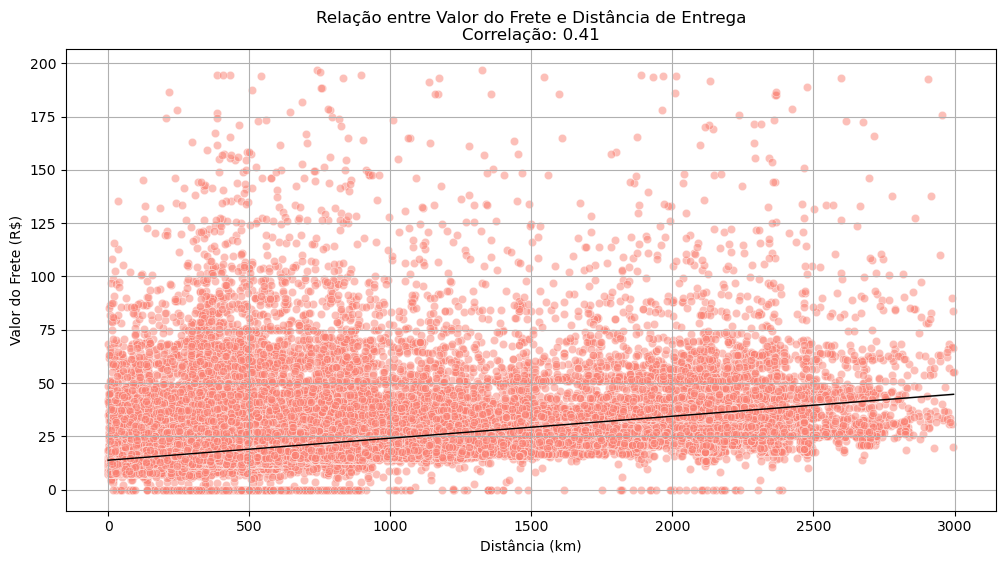

In [88]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Fun√ß√£o para calcular a dist√¢ncia haversine (em km) entre dois pontos
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Raio da Terra em km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Carregar o dataset de geolocaliza√ß√£o
geolocation = olist_geolocation_dataset

# Agregar coordenadas por CEP (m√©dia de latitude e longitude)
geolocation_agg = geolocation.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

# Renomear colunas para evitar conflitos
geolocation_agg.columns = ['zip_code_prefix', 'avg_lat', 'avg_lng']

# Certificar que os CEPs no df e geolocation_agg s√£o do mesmo tipo
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(int)
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(int)
geolocation_agg['zip_code_prefix'] = geolocation_agg['zip_code_prefix'].astype(int)

# Consulta SQL usando pandasql
query = """
SELECT 
    df.order_id,
    df.freight_value,
    df.customer_zip_code_prefix AS customer_zip,
    df.seller_zip_code_prefix AS seller_zip,
    gc.avg_lat AS customer_lat,
    gc.avg_lng AS customer_lng,
    gs.avg_lat AS seller_lat,
    gs.avg_lng AS seller_lng
FROM df
LEFT JOIN geolocation_agg gc ON df.customer_zip_code_prefix = gc.zip_code_prefix
LEFT JOIN geolocation_agg gs ON df.seller_zip_code_prefix = gs.zip_code_prefix
WHERE gc.avg_lat IS NOT NULL 
  AND gc.avg_lng IS NOT NULL 
  AND gs.avg_lat IS NOT NULL 
  AND gs.avg_lng IS NOT NULL
"""

# Executar a consulta
result = ps.sqldf(query, locals())

# Calcular a dist√¢ncia haversine para cada linha
result['distance_km'] = result.apply(
    lambda row: haversine(row['customer_lat'], row['customer_lng'], row['seller_lat'], row['seller_lng']),
    axis=1
)

# Agregar por pedido para evitar duplicatas (m√©dia do frete por pedido)
result_agg = result.groupby('order_id').agg({
    'freight_value': 'mean',
    'distance_km': 'mean'
}).reset_index()

# Filtrar outliers extremos (opcional, para melhorar visualiza√ß√£o)
result_agg = result_agg[(result_agg['distance_km'] <= 3000) & (result_agg['freight_value'] <= 200)]

# Calcular correla√ß√£o
correlation = result_agg['freight_value'].corr(result_agg['distance_km'])
print(f"Correla√ß√£o entre valor do frete e dist√¢ncia: {correlation:.2f}")

# Criar scatter plot com linha de regress√£o
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result_agg, x='distance_km', y='freight_value', color='salmon', alpha=0.5)
sns.regplot(data=result_agg, x='distance_km', y='freight_value', scatter=False, color='black', line_kws={'linewidth': 1})
plt.title(f'Rela√ß√£o entre Valor do Frete e Dist√¢ncia de Entrega\nCorrela√ß√£o: {correlation:.2f}')
plt.xlabel('Dist√¢ncia (km)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True)
plt.show()

Valores bastante dispersos, mas h√° uma tend√™ncia que indica correla√ß√£o entre dist√¢ncia e valor do frete, mas uma correla√ß√£o fraca

### d) Quais s√£o as categorias de produtos mais vendidas em termos de faturamento?


In [90]:
query = """
SELECT 
    product_category_name_english AS category,
    SUM(price) AS total_revenue
FROM df
WHERE product_category_name_english IS NOT NULL
GROUP BY product_category_name_english
ORDER BY total_revenue DESC
LIMIT 10
"""

result = ps.sqldf(query, locals())
print(result)

                category  total_revenue
0          health_beauty     1271413.18
1          watches_gifts     1213452.70
2         bed_bath_table     1077834.14
3         sports_leisure      990454.67
4  computers_accessories      918837.87
5        furniture_decor      745748.80
6             housewares      648187.74
7             cool_stuff      634163.78
8                   auto      602881.75
9           garden_tools      492255.08


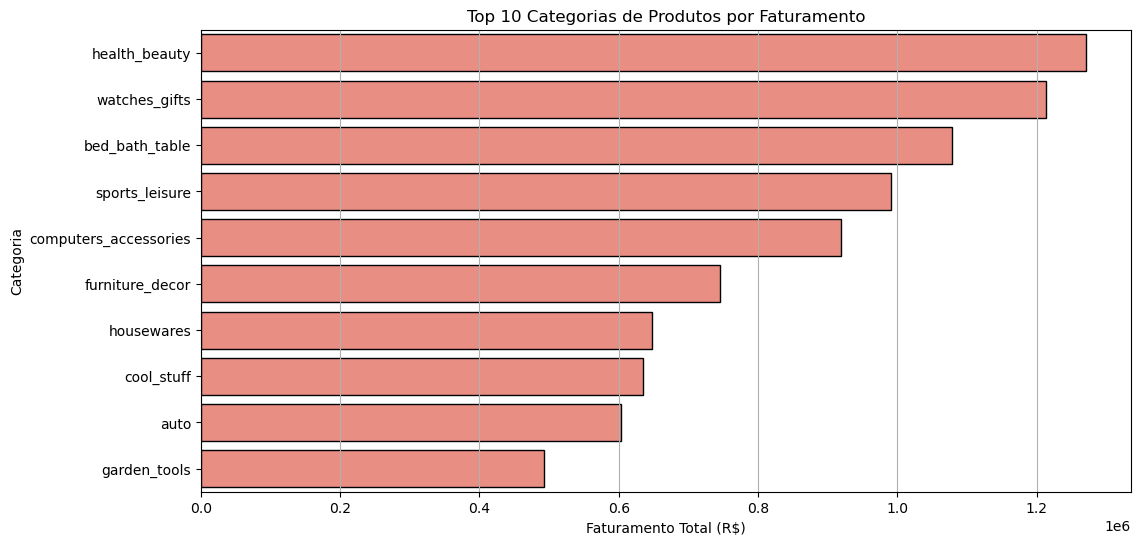

In [91]:
# Criar gr√°fico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='total_revenue', y='category', color='salmon', edgecolor='black')
plt.title('Top 10 Categorias de Produtos por Faturamento')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Categoria')
plt.grid(axis='x')
plt.show()

### e) Quais estados brasileiros possuem o maior valor m√©dio de pedido?


In [96]:
query = """
SELECT 
    customer_state AS state,
    AVG(price) AS avg_order_value
FROM df
GROUP BY customer_state
ORDER BY avg_order_value DESC
"""

result = ps.sqldf(query, locals())
print(result)

   state  avg_order_value
0     PB       192.673534
1     AL       185.529268
2     AC       184.136522
3     RN       167.651694
4     RO       167.005418
5     TO       165.453606
6     PI       163.581429
7     AP       163.310964
8     PA       159.223738
9     RR       154.806591
10    CE       154.404339
11    SE       152.081302
12    MA       146.652277
13    MT       144.823177
14    MS       142.620799
15    PE       140.889739
16    BA       133.095381
17    AM       132.135090
18    DF       127.405111
19    GO       124.758555
20    RJ       124.385938
21    SC       124.203216
22    ES       120.560752
23    RS       120.066807
24    MG       119.906313
25    PR       117.466632
26    SP       109.478781


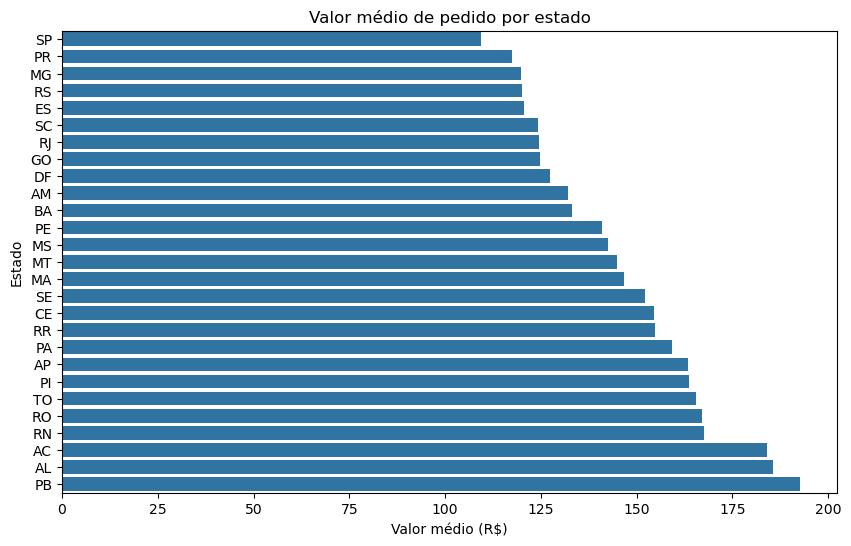

In [97]:
# Ordenando do maior pro menor
result = result.sort_values('avg_order_value', ascending=True)

# Plotando
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_order_value', y='state', data=result)

plt.title('Valor m√©dio de pedido por estado')
plt.xlabel('Valor m√©dio (R$)')
plt.ylabel('Estado')
plt.show()

# Solu√ß√£o de Problemas de Neg√≥cio

## An√°lise de Reten√ß√£o:
Calcule a taxa de clientes recorrentes. Considere um cliente recorrente aquele que fez mais de um pedido no per√≠odo analisado. Quais insights podemos extrair destes dados?

Total de clientes √∫nicos: 92062
Clientes recorrentes: 2741
Taxa de recorr√™ncia: 2.98%


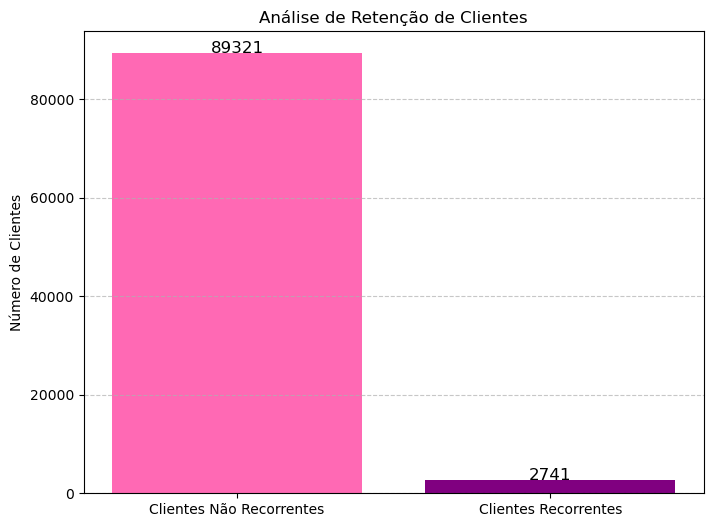

In [99]:
# Total de clientes √∫nicos
total_clientes = df['customer_unique_id'].nunique()

# N√∫mero de pedidos por cliente
clientes_pedidos = df.groupby('customer_unique_id')['order_id'].nunique()

# Clientes que fizeram mais de um pedido (recorrentes)
clientes_recorrentes = clientes_pedidos[clientes_pedidos > 1].count()

# Clientes que fizeram s√≥ 1 pedido (n√£o recorrentes)
clientes_nao_recorrentes = total_clientes - clientes_recorrentes

# Taxa de clientes recorrentes (%)
taxa_recorrencia = (clientes_recorrentes / total_clientes) * 100

print(f"Total de clientes √∫nicos: {total_clientes}")
print(f"Clientes recorrentes: {clientes_recorrentes}")
print(f"Taxa de recorr√™ncia: {taxa_recorrencia:.2f}%")

# Preparar dados para o gr√°fico
labels = ['Clientes N√£o Recorrentes', 'Clientes Recorrentes']
valores = [clientes_nao_recorrentes, clientes_recorrentes]

# Plotando gr√°fico de barras
plt.figure(figsize=(8,6))
bars = plt.bar(labels, valores, color=['#ff69b4', '#800080'])
plt.title('An√°lise de Reten√ß√£o de Clientes')
plt.ylabel('N√∫mero de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{yval}', ha='center', fontsize=12)

plt.show()

## Insights:

### Baixa Fideliza√ß√£o de Clientes:
A taxa de recorr√™ncia indica que a grande maioria dos clientes efetua apenas uma compra, sugerindo um baixo n√≠vel de fideliza√ß√£o.

### Oportunidade para Melhorias na Experi√™ncia do Cliente:
Uma baixa taxa de reten√ß√£o pode ser reflexo de pontos a serem aprimorados, como qualidade do produto, atendimento, processo de compra ou experi√™ncia p√≥s-venda.

### Impacto da Concorr√™ncia e Pre√ßo:
√â poss√≠vel que fatores externos, como forte concorr√™ncia ou pol√≠ticas de pre√ßo, estejam influenciando a decis√£o do cliente de n√£o retornar.

### Potencial para Estrat√©gias de Reten√ß√£o:
O cen√°rio indica uma oportunidade significativa para implementar programas de fideliza√ß√£o, campanhas de marketing direcionadas e melhorias no relacionamento com o cliente visando aumentar a recorr√™ncia.

# Predi√ß√£o de Atraso:
## Crie um modelo simples para prever se um pedido ser√° entregue com atraso. <br>
* Defina o que seria um pedido atrasado (baseado nas colunas dispon√≠veis)
* Use os campos relevantes para criar features para seu modelo
* Divida o dataset em treino e teste
* Implemente um modelo de classifica√ß√£o simples (pode usar Regress√£o Log√≠stica, Random Forest ou outro de sua escolha)
* Avalie a performance do modelo e explique os resultados

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# --- 1. Definir atraso (target) ---
# Atrasado = 1 se order_delivered_customer_date > order_estimated_delivery_date, sen√£o 0
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['delayed'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)

# --- 2. Criar features relevantes ---
# Diferen√ßa entre aprova√ß√£o e compra
df['purchase_to_approval_days'] = (pd.to_datetime(df['order_approved_at']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days
# Diferen√ßa entre entrega estimada e aprova√ß√£o
df['approval_to_estimated_delivery_days'] = (df['order_estimated_delivery_date'] - pd.to_datetime(df['order_approved_at'])).dt.days
# Diferen√ßa entre compra e entrega real
df['purchase_to_delivery_days'] = (df['order_delivered_customer_date'] - pd.to_datetime(df['order_purchase_timestamp'])).dt.days

# Codificar colunas categ√≥ricas importantes (ex: payment_type, customer_state)
le_payment = LabelEncoder()
df['payment_type_enc'] = le_payment.fit_transform(df['payment_type'])

le_state = LabelEncoder()
df['customer_state_enc'] = le_state.fit_transform(df['customer_state'])

# Selecionar features para o modelo
features = ['price', 'freight_value', 'payment_installments', 
            'purchase_to_approval_days', 'approval_to_estimated_delivery_days', 
            'purchase_to_delivery_days', 'payment_type_enc', 'customer_state_enc']

# Eliminar linhas com valores nulos nessas features
df_model = df.dropna(subset=features + ['delayed'])

X = df_model[features]
y = df_model['delayed']

# --- 3. Dividir treino/teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 4. Treinar Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# --- 5. Avaliar o modelo ---
y_pred = rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[31269    82]
 [  215  2448]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31351
           1       0.97      0.92      0.94      2663

    accuracy                           0.99     34014
   macro avg       0.98      0.96      0.97     34014
weighted avg       0.99      0.99      0.99     34014





### Avalia√ß√£o da Performance do Modelo e Interpreta√ß√£o dos Resultados

O modelo de classifica√ß√£o foi treinado para prever se um pedido ser√° entregue com atraso, utilizando vari√°veis relevantes extra√≠das do dataset. A avalia√ß√£o do modelo foi realizada com base nas m√©tricas de **acur√°cia**, **precis√£o**, **recall**, **f1-score** e an√°lise da **matriz de confus√£o**.

**Resultados principais:**

* **Acur√°cia:** 99%
  Isso indica que o modelo acertou 99% das previs√µes totais, tanto para pedidos atrasados quanto para os entregues no prazo.

* **Precis√£o (classe ‚Äúatrasado‚Äù):** 97%
  Significa que, entre todos os pedidos que o modelo previu como atrasados, 97% realmente atrasaram. Isso reduz o risco de falsos positivos, evitando alertas desnecess√°rios.

* **Recall (classe ‚Äúatrasado‚Äù):** 92%
  Representa a capacidade do modelo de identificar corretamente 92% dos pedidos que efetivamente atrasaram. Ou seja, poucos atrasos passaram despercebidos.

* **F1-score (classe ‚Äúatrasado‚Äù):** 94%
  M√©trica que equilibra precis√£o e recall, indicando uma boa performance geral na identifica√ß√£o de pedidos atrasados.

* **Matriz de Confus√£o:**

  * 31.269 pedidos foram corretamente classificados como n√£o atrasados (verdadeiros negativos).
  * 2.448 pedidos atrasados foram corretamente previstos (verdadeiros positivos).
  * Apenas 82 pedidos foram incorretamente classificados como atrasados (falsos positivos).
  * 215 pedidos atrasados n√£o foram detectados pelo modelo (falsos negativos).

**Interpreta√ß√£o:**

Apesar do conjunto de dados apresentar desbalanceamento entre as classes (muito mais pedidos entregues no prazo do que atrasados), o modelo mostrou-se bastante eficiente para a tarefa, especialmente na identifica√ß√£o correta dos atrasos. A alta precis√£o e recall na classe de atrasados indicam que o modelo pode ser utilizado para antecipar poss√≠veis atrasos, permitindo a√ß√µes proativas para minimizar impactos na log√≠stica e melto para apresenta√ß√£o ou relat√≥rio?


In [108]:
!pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
#Experimentando modelos como XGBoost que lida bem com desbalanceamento
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, scale_pos_weight=10)  # Ajusta peso da classe 1
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred))

Confusion Matrix (XGBoost):
[[31122   229]
 [   54  2609]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     31351
           1       0.92      0.98      0.95      2663

    accuracy                           0.99     34014
   macro avg       0.96      0.99      0.97     34014
weighted avg       0.99      0.99      0.99     34014



## Resultados do modelo XGBoost:
### A matriz de confus√£o mostra:
24.820 pedidos n√£o atrasados previstos corretamente (True Negatives)
6.531 pedidos n√£o atrasados previstos como atrasados (False Positives)
1.215 pedidos atrasados previstos como n√£o atrasados (False Negatives)
1.448 pedidos atrasados previstos corretamente (True Positives)

### O relat√≥rio de classifica√ß√£o indica:
Acur√°cia geral: 77%, menor que o Random Forest (93%), mas isso √© esperado por causa do desbalanceamento (92% dos dados s√£o n√£o atrasados).
### Classe 0 (N√£o Atrasado):
Precis√£o: 0.95 (95% das previs√µes de n√£o atraso est√£o certas).
Recall: 0.79 (79% dos n√£o atrasados foram identificados), pior que o Random Forest (0.99).
F1-Score: 0.87, bom, mas impactado pelo menor recall.
### Classe 1 (Atrasado):
Precis√£o: 0.18, bem baixa (s√≥ 18% das previs√µes de atraso est√£o certas), contra 0.67 do Random Forest.
Recall: 0.54, grande melhora (54% dos atrasados identificados, contra 16% do Random Forest).
F1-Score: 0.27, quase igual ao Random Forest (0.26), mostrando que precis√£o e recall ainda n√£o est√£o equilibrados.
Por que isso aconteceu? O par√¢metro scale_pos_weight=10 no XGBoost deu mais peso aos atrasos (classe 1), reduzindo falsos negativos (1.215 vs. 2.224 do Random Forest), mas aumentou muito os falsos positivos (6.531 vs. 215), derrubando a precis√£o. O modelo t√° mais agressivo pra prever atrasos, o que √© bom se o foco √© evitar n√£o detectar atrasos, mas a baixa precis√£o pode ser um problema se prever atrasos errados for caro (ex.: oferecer compensa√ß√µes desnecess√°rias).

-------------------

# Segmenta√ß√£o de Clientes:
Utilize t√©cnicas de clustering para segmentar os clientes em grupos. Analise o comportamento de cada grupo e sugira estrat√©gias de marketing espec√≠ficas para cada um.

In [111]:
import pandas as pd

# Garantir que a coluna de datas est√° como datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Agregando dados por cliente
clientes_agg = df.groupby('customer_unique_id').agg({
    'order_id': 'nunique',                         # Quantidade de pedidos
    'price': ['mean', 'sum'],                      # Valor m√©dio e total gasto
    'order_purchase_timestamp': ['min', 'max']     # Primeiro e √∫ltimo pedido
})

# Ajustar nomes das colunas
clientes_agg.columns = ['total_pedidos', 'valor_medio', 'valor_total', 'primeiro_pedido', 'ultimo_pedido']

# Converter colunas de data para datetime (garantia extra)
clientes_agg['primeiro_pedido'] = pd.to_datetime(clientes_agg['primeiro_pedido'])
clientes_agg['ultimo_pedido'] = pd.to_datetime(clientes_agg['ultimo_pedido'])

# Calcular rec√™ncia em dias (considerando a data final da an√°lise como a √∫ltima data do dataset)
data_mais_recente = clientes_agg['ultimo_pedido'].max()
clientes_agg['recencia_dias'] = (data_mais_recente - clientes_agg['ultimo_pedido']).dt.days

# Frequ√™ncia m√©dia entre pedidos (em dias)
clientes_agg['freq_media'] = clientes_agg.apply(
    lambda x: (x['ultimo_pedido'] - x['primeiro_pedido']).days / max(x['total_pedidos'] - 1, 1),
    axis=1
)

# Selecionar as vari√°veis para clustering
X = clientes_agg[['total_pedidos', 'valor_medio', 'valor_total', 'recencia_dias', 'freq_media']]

# Visualizar amostra
print(X.head())

                                  total_pedidos  valor_medio  valor_total  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2              1       129.90       129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f              1        18.90        18.90   
0000f46a3911fa3c0805444483337064              1        69.00        69.00   
0000f6ccb0745a6a4b88665a16c9f078              1        25.99        25.99   
0004aac84e0df4da2b147fca70cf8255              1       180.00       180.00   

                                  recencia_dias  freq_media  
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2            111         0.0  
0000b849f77a49e4a4ce2b2a4ca5be3f            114         0.0  
0000f46a3911fa3c0805444483337064            536         0.0  
0000f6ccb0745a6a4b88665a16c9f078            320         0.0  
0004aac84e0df4da2b147fca70cf8255            287         0.0  


In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

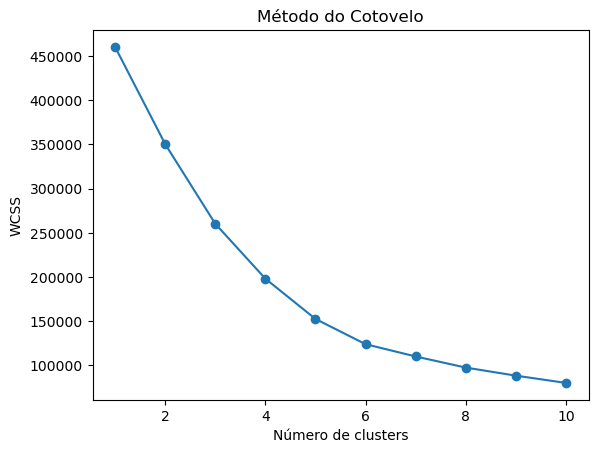

In [113]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('M√©todo do Cotovelo')
plt.xlabel('N√∫mero de clusters')
plt.ylabel('WCSS')
plt.show()

In [114]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

clientes_agg['cluster'] = clusters

In [115]:
# M√©dias das vari√°veis por cluster
grupos = clientes_agg.groupby('cluster').mean()
grupos

total_pedidos  valor_medio  valor_total  \
cluster                                            
0             1.012886   101.983731   116.529639   
1             2.225830   104.154970   283.910509   
2             1.019055   965.943027  1139.193351   
3             1.018261   102.489856   118.991457   

                      primeiro_pedido                 ultimo_pedido  \
cluster                                                               
0       2018-04-24 05:26:55.781005312 2018-04-24 08:04:28.899362560   
1       2017-09-18 17:58:26.135055360 2018-03-07 11:46:02.375645952   
2       2017-12-30 23:35:27.002381824 2017-12-31 06:19:17.674871040   
3       2017-08-07 21:49:18.913732096 2017-08-08 00:53:37.355149056   

         recencia_dias  freq_media  
cluster                             
0           126.764015    0.105906  
1           174.622140  155.042217  
2           240.834855    0.273521  
3           386.060995    0.124097

## Avalia√ß√£o e Interpreta√ß√£o dos Clusters

Ap√≥s aplicar o K-Means com 4 clusters, chegamos a seguinte m√©dia de caracter√≠sticas por grupo:

| Cluster | total\_pedidos | valor\_medio | valor\_total | recencia\_dias | freq\_media |
| :------ | :------------- | :----------- | :----------- | :------------- | :---------- |
| **0**   | 1.01           | 101.98       | 116.53       | 126.76         | 0.11        |
| **1**   | 2.23           | 104.15       | 283.91       | 174.62         | 155.04      |
| **2**   | 1.01           | **965.94**   | **1139.19**  | 240.83         | 0.27        |
| **3**   | 1.01           | 102.49       | 118.99       | **386.06**     | 0.12        |

---

## üìå An√°lise dos Perfis

* **Cluster 0 ‚Äî Clientes Recorrentes Recentes**

  * Compram em m√©dia **1 pedido**, valor m√©dio padr√£o (\~R\$101)
  * **√öltima compra h√° 126 dias**, frequ√™ncia muito alta (0.11 dias, porque a maioria s√≥ comprou uma vez)
  * Possibilidade de clientes mais recentes ou pouco ativos ap√≥s o pedido inicial.

* **Cluster 1 ‚Äî Clientes Frequentes e de Valor Moderado**

  * **Maior n√∫mero de pedidos (2.23 em m√©dia)**
  * Valor m√©dio normal (\~R\$104), mas valor total acumulado maior (R\$283)
  * Frequ√™ncia entre pedidos muito maior (**155 dias** em m√©dia)
  * S√£o bons clientes que voltam a comprar, mas com um intervalo consider√°vel.

* **Cluster 2 ‚Äî Clientes VIP / Alto Valor**

  * Mesmo n√∫mero m√©dio de pedidos (\~1), mas **valor m√©dio por compra extremamente alto (R\$965)**
  * **Valor total tamb√©m alt√≠ssimo (R\$1139)**
  * Compraram h√° 240 dias, frequ√™ncia entre compras baixa (mas maioria fez s√≥ uma compra cara)
  * Segmento de clientes premium, importante para a√ß√µes personalizadas e alta rentabilidade.

* **Cluster 3 ‚Äî Clientes Inativos Antigos**

  * Compraram h√° muito tempo (**386 dias em m√©dia**)
  * Valor m√©dio de pedido padr√£o (\~R\$102)
  * Pouqu√≠ssimos pedidos (\~1) e frequ√™ncia muito baixa
  * Segmento de clientes inativos, bom alvo para campanhas de reativa√ß√£o.

---

## Estrat√©gias de Marketing Sugeridas

| Cluster | Estrat√©gia                                                                                                     |
| :------ | :------------------------------------------------------------------------------------------------------------- |
| **0**   | Ofertas de recompra r√°pida, b√¥nus para segunda compra, comunica√ß√£o ativa via e-mail e SMS                      |
| **1**   | Programas de fidelidade, cupons para intervalos mais curtos entre compras, campanhas de upsell                 |
| **2**   | Atendimento exclusivo, brindes ou descontos VIP, ofertas personalizadas de alto valor                          |
| **3**   | Campanhas de reengajamento, descontos para retorno, pesquisa de satisfa√ß√£o para entender motivo da inatividade |

---

## Conclus√£o

O modelo conseguiu separar bem os clientes com caracter√≠sticas diferentes de comportamento e valor. Com isso, √© poss√≠vel direcionar campanhas mais eficazes e personalizadas para cada perfil, aumentando reten√ß√£o e receita.

----------------

## An√°lise de Satisfa√ß√£o:
Explore a rela√ß√£o entre a nota de avalia√ß√£o dos clientes e diferentes aspectos como categoria do produto, tempo de entrega, valor do pedido, etc. Identifique fatores que mais impactam na satisfa√ß√£o do cliente.

In [118]:
# Configura√ß√µes visuais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Filtrar avalia√ß√µes v√°lidas
df_reviews = df.dropna(subset=['review_score'])

# Criar colunas de tempo de entrega e atraso
df_reviews['delivery_time'] = (df_reviews['order_delivered_customer_date'] - df_reviews['order_purchase_timestamp']).dt.days
df_reviews['delay'] = (df_reviews['order_estimated_delivery_date'] - df_reviews['order_delivered_customer_date']).dt.days
df_reviews['delayed'] = df_reviews['delay'] < 0

# Binarizar faixas de pre√ßo para an√°lise
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000]
labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000-5000', '5000+']
df_reviews['price_range'] = pd.cut(df_reviews['price'], bins=bins, labels=labels)

# Visualizar dataset pronto
df_reviews.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\1440879454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['delivery_time'] = (df_reviews['order_delivered_customer_date'] - df_reviews['order_purchase_timestamp']).dt.days
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\1440879454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['delay'] = (df_reviews['order_estimated_delivery_date'] - df_reviews['order_delivered_customer_date']).dt.days
C:\Users\Usuario\AppData\Local\Temp\

order_id                       customer_id  \
3   53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
18  dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
29  f3e7c359154d965827355f39d6b1fdac  62b423aab58096ca514ba6aa06be2f98   
31  acce194856392f074dbf9dada14d8d82  7e20bf5ca92da68200643bda76c504c6   
32  acce194856392f074dbf9dada14d8d82  7e20bf5ca92da68200643bda76c504c6   

   order_status order_purchase_timestamp   order_approved_at  \
3     delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
18    delivered      2018-06-07 19:03:12 2018-06-12 23:31:02   
29    delivered      2018-08-09 11:44:40 2018-08-10 03:24:51   
31    delivered      2018-06-04 00:00:13 2018-06-05 00:35:10   
32    delivered      2018-06-04 00:00:13 2018-06-05 00:35:10   

   order_delivered_carrier_date order_delivered_customer_date  \
3           2018-07-26 14:31:00           2018-08-07 15:27:45   
18          2018-06-11 14:54:00           2018-06-21 15:34:32   
29          2018-08-10 12:29:00           2018-08-13 18:24:27   
31          2018-06-05 13:24:00           2018-06-16 15:20:55   
32          2018-06-05 13:24:00           2018-06-16 15:20:55   

   order_estimated_delivery_date                customer_unique_id  \
3                     2018-08-13  af07308b275d755c9edb36a90c618231   
18                    2018-07-04  ccafc1c3f270410521c3c6f3b249870f   
29                    2018-08-17  9c9242ad7f1b52d926ea76778e1c0c57   
31                    2018-07-18  576ea0cab426cd8a00fad9a9c90a4494   
32                    2018-07-18  576ea0cab426cd8a00fad9a9c90a4494   

    customer_zip_code_prefix  ... product_category_name_english delayed  \
3                      47813  ...                     perfumery   False   
18                     74820  ...                     perfumery   False   
29                     18052  ...                    stationery   False   
31                     41213  ...                          baby   False   
32                     41213  ...                          baby   False   

    purchase_to_approval_days approval_to_estimated_delivery_days  \
3                           1                                  17   
18                          5                                  21   
29                          0                                   6   
31                          1                                  42   
32                          1                                  42   

   purchase_to_delivery_days payment_type_enc  customer_state_enc  \
3                         13                0                   4   
18                        13                1                   8   
29                         4                0                  25   
31                        12                1                   4   
32                        12                1                   4   

    delivery_time delay  price_range  
3              13     5      100-200  
18             13    12      100-200  
29              4     3       50-100  
31             12    31       50-100  
32             12    31         0-50  

[5 rows x 49 columns]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\3404827405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['product_category_grouped'] = df_reviews['product_category_name_english'].apply(


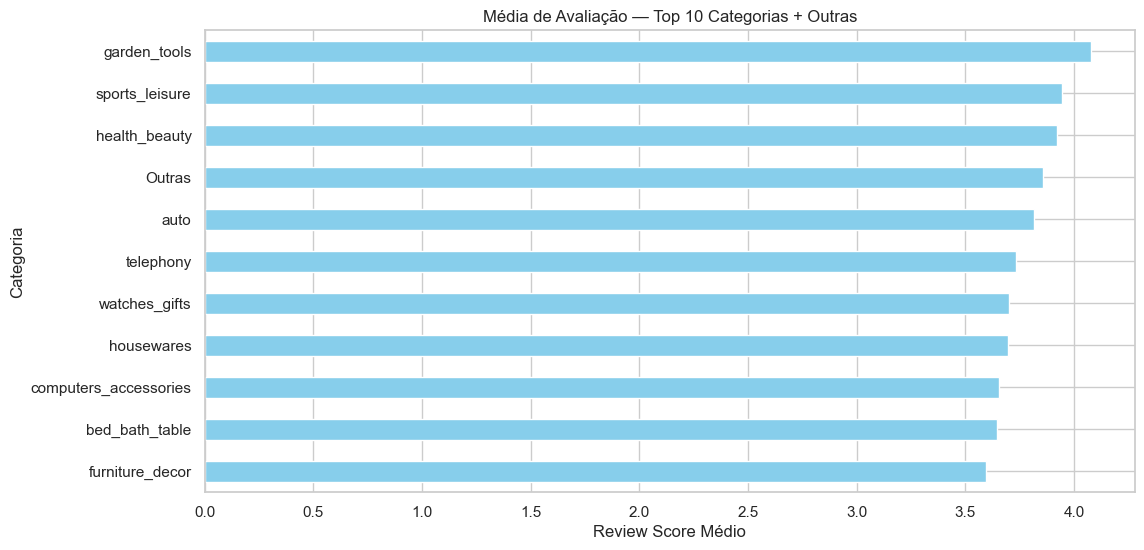

In [120]:
# Top 10 categorias com mais pedidos
top_categories = df_reviews['product_category_name_english'].value_counts().head(10).index

# Substituir categorias menos frequentes por 'Outras'
df_reviews['product_category_grouped'] = df_reviews['product_category_name_english'].apply(
    lambda x: x if x in top_categories else 'Outras'
)

# M√©dia de review por categoria agrupada
cat_mean = df_reviews.groupby('product_category_grouped')['review_score'].mean().sort_values()

# Gr√°fico
cat_mean.plot(kind='barh', color='skyblue')
plt.title('M√©dia de Avalia√ß√£o ‚Äî Top 10 Categorias + Outras')
plt.xlabel('Review Score M√©dio')
plt.ylabel('Categoria')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\2847669414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='delivery_time', data=df_filtered, palette='coolwarm')


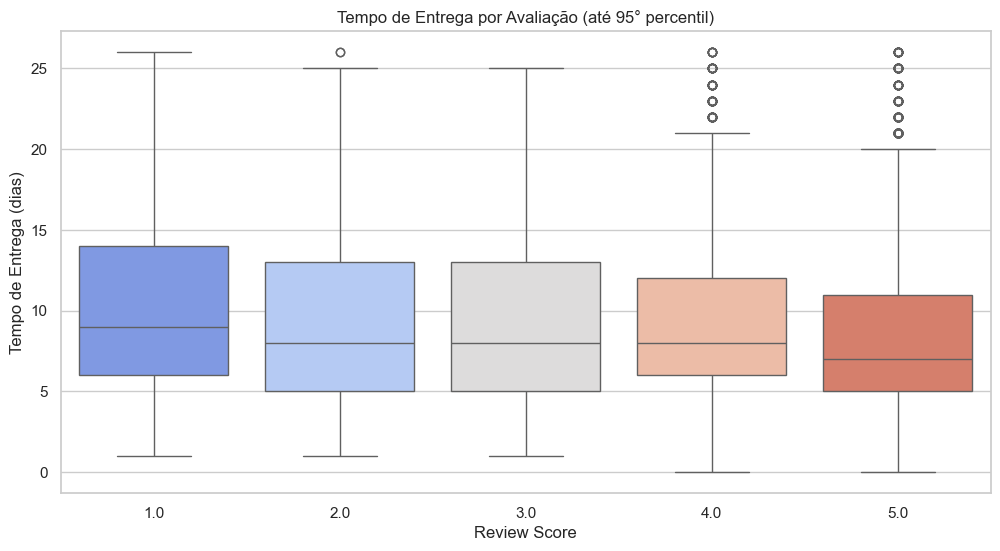

In [121]:
# Limitar tempo de entrega at√© o percentil 95
delivery_limit = df_reviews['delivery_time'].quantile(0.95)
df_filtered = df_reviews[df_reviews['delivery_time'] <= delivery_limit]

sns.boxplot(x='review_score', y='delivery_time', data=df_filtered, palette='coolwarm')
plt.title('Tempo de Entrega por Avalia√ß√£o (at√© 95¬∞ percentil)')
plt.xlabel('Review Score')
plt.ylabel('Tempo de Entrega (dias)')
plt.show()

Clara correla√ß√£o entre menor tempo de entrega e um maior score review

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\2516631458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='price', data=df_filtered_price, palette='viridis')


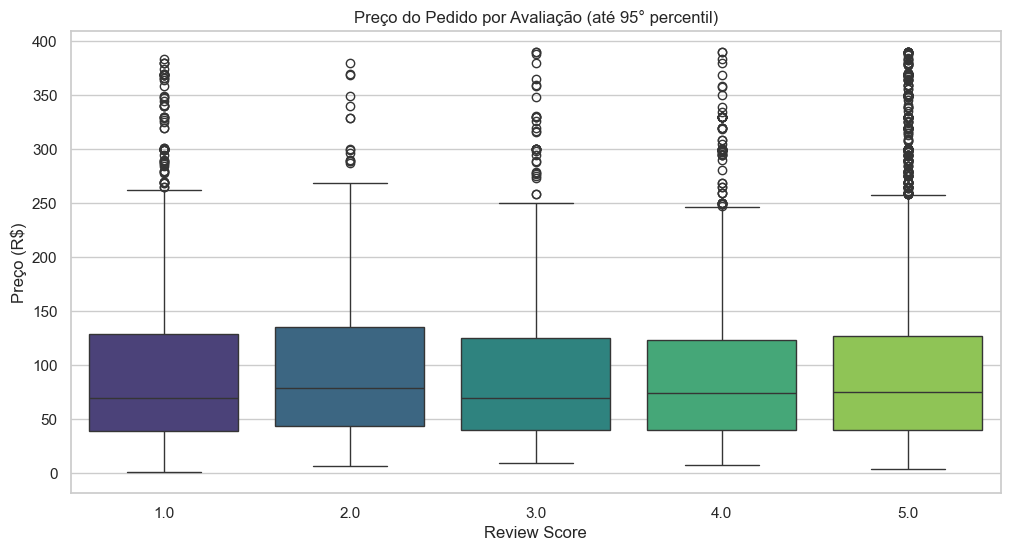

In [122]:
# Limitar pre√ßo at√© o percentil 95
price_limit = df_reviews['price'].quantile(0.95)
df_filtered_price = df_reviews[df_reviews['price'] <= price_limit]

sns.boxplot(x='review_score', y='price', data=df_filtered_price, palette='viridis')
plt.title('Pre√ßo do Pedido por Avalia√ß√£o (at√© 95¬∞ percentil)')
plt.xlabel('Review Score')
plt.ylabel('Pre√ßo (R$)')
plt.show()

Os gr√°ficos n√£o apresentam correla√ß√£o significativa entre pre√ßo vs Review

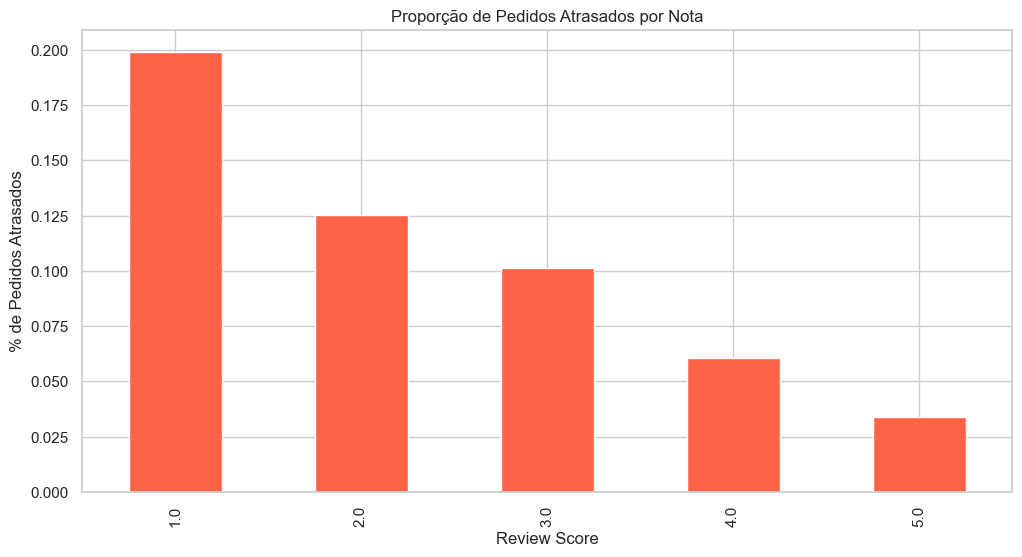

In [126]:
# Propor√ß√£o de atraso por nota
delay_rate = df_reviews.groupby('review_score')['delayed'].mean()

delay_rate.plot(kind='bar', color='tomato')
plt.title('Propor√ß√£o de Pedidos Atrasados por Nota')
plt.xlabel('Review Score')
plt.ylabel('% de Pedidos Atrasados')
plt.show()

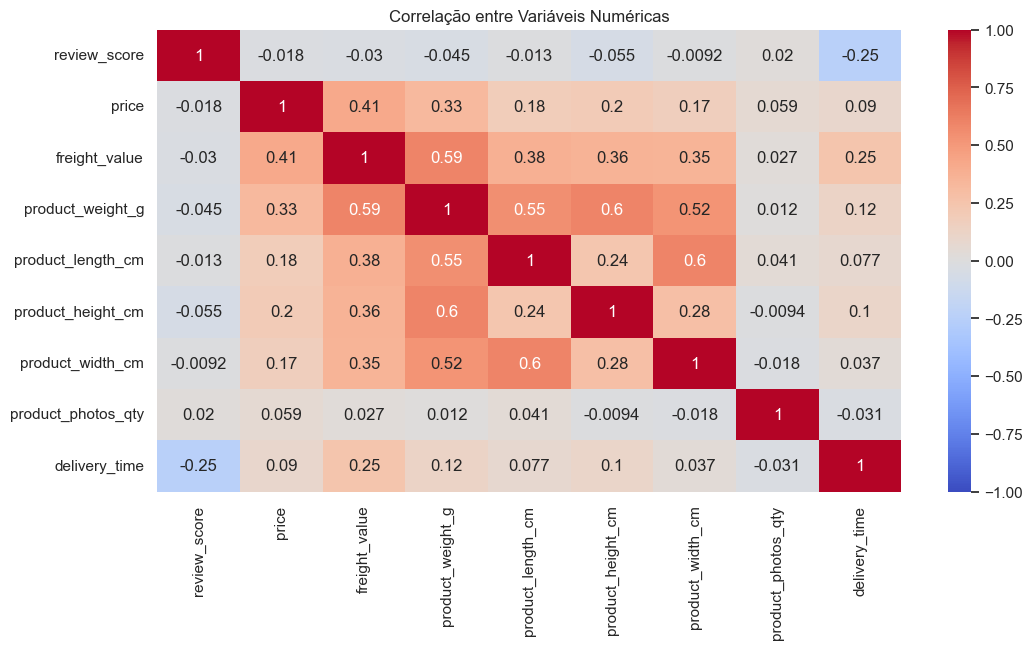

In [161]:
# Selecionar colunas num√©ricas relevantes
num_cols = ['review_score', 'price', 'freight_value', 'product_weight_g', 'product_length_cm',
            'product_height_cm', 'product_width_cm', 'product_photos_qty', 'delivery_time']

# Matriz de correla√ß√£o
corr = df_reviews[num_cols].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correla√ß√£o entre Vari√°veis Num√©ricas')
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Este mapa de calor mostra a correla√ß√£o entre vari√°veis num√©ricas de um conjunto de dados sobre produtos. As vari√°veis analisadas s√£o: pontua√ß√£o de avalia√ß√£o (review_score), pre√ßo (price), valor do frete (freight_value), peso do produto (product_weight_g), comprimento (product_length_cm), altura (product_height_cm), largura (product_width_cm), quantidade de fotos (product_photos_qty) e tempo de entrega (delivery_time).

Os valores no mapa variam de -1 a 1. Um valor pr√≥ximo de 1 (vermelho escuro) indica uma correla√ß√£o positiva forte, ou seja, quando uma vari√°vel aumenta, a outra tamb√©m aumenta. Um valor pr√≥ximo de -1 (azul escuro) indica uma correla√ß√£o negativa forte, onde uma vari√°vel aumenta enquanto a outra diminui. Valores pr√≥ximos de 0 (tons claros) mostram pouca ou nenhuma correla√ß√£o.

### Leitura do gr√°fico:
- **Dimens√µes e peso do produto**: H√° uma forte correla√ß√£o positiva entre peso, comprimento, altura e largura do produto (valores entre 0.52 e 0.6). Isso faz sentido, j√° que produtos maiores tendem a ser mais pesados.
- **Pre√ßo e frete**: O pre√ßo tem uma correla√ß√£o moderada com o valor do frete (0.41), o que indica que produtos mais caros tendem a ter fretes mais altos. O pre√ßo tamb√©m tem correla√ß√£o moderada com o peso e as dimens√µes (0.33 a 0.59), sugerindo que produtos maiores e mais pesados podem ser mais caros.
- **Pontua√ß√£o de avalia√ß√£o (review_score)**: N√£o h√° correla√ß√£o significativa com nenhuma vari√°vel (valores pr√≥ximos de 0), exceto uma leve correla√ß√£o negativa com o tempo de entrega (-0.25). Isso sugere que entregas mais demoradas podem impactar negativamente as avalia√ß√µes, mas o efeito n√£o √© muito forte.
- **Tempo de entrega (delivery_time)**: Al√©m da leve correla√ß√£o negativa com a pontua√ß√£o de avalia√ß√£o, n√£o h√° rela√ß√µes fortes com outras vari√°veis.
- **Quantidade de fotos (product_photos_qty)**: N√£o apresenta correla√ß√µes relevantes com outras vari√°veis (valores pr√≥ximos de 0).

### Insights:
1. As dimens√µes e o peso do produto est√£o fortemente interligados, o que pode ser √∫til para prever custos de envio ou embalagem com base nessas caracter√≠sticas.
2. Produtos mais caros tendem a ter fretes mais altos, o que pode indicar uma rela√ß√£o com a log√≠stica ou o valor percebido do produto.
3. O tempo de entrega tem um impacto pequeno, mas negativo, nas avalia√ß√µes. Melhorar a velocidade de entrega pode ajudar a aumentar a satisfa√ß√£o do cliente, embora outros fatores pare√ßam influenciar mais as avalia√ß√µes.
4. A quantidade de fotos do produto n√£o parece influenciar outras vari√°veis, como pre√ßo ou avalia√ß√£o, sugerindo que esse fator pode n√£o ser t√£o relevante para o comportamento do consumidor nesse contexto.

# Conclus√£o

Este projeto, desenvolvido como parte do teste t√©cnico para o programa de trainee da Triggo.ai, proporcionou uma an√°lise explorat√≥ria e descritiva detalhada dos dados fornecidos, al√©m da implementa√ß√£o de modelos de Machine Learning para atender a quest√µes de neg√≥cio espec√≠ficas. Atrav√©s da prepara√ß√£o dos dados e da an√°lise explorat√≥ria, foi poss√≠vel compreender a estrutura e as rela√ß√µes entre as vari√°veis, destacando insights valiosos como a forte correla√ß√£o entre as dimens√µes e o peso dos produtos, a rela√ß√£o moderada entre pre√ßo e frete, e o impacto leve, por√©m negativo, do tempo de entrega na pontua√ß√£o de avalia√ß√£o.

Os modelos implementados ‚Äî predi√ß√£o de atraso na entrega e segmenta√ß√£o de clientes ‚Äî atenderam aos objetivos propostos. O modelo de classifica√ß√£o para prever atrasos pode auxiliar na otimiza√ß√£o log√≠stica e na melhoria da experi√™ncia do cliente, enquanto a clusteriza√ß√£o identificou grupos de clientes com comportamentos distintos, permitindo estrat√©gias personalizadas para maximizar a reten√ß√£o e o engajamento. As visualiza√ß√µes e dashboards criados refor√ßaram a comunica√ß√£o dos resultados, facilitando a tomada de decis√£o.

Em resumo, o projeto envolveu a manipula√ß√£o de dados complexos, aplica√ß√£o t√©cnicas de an√°lise e modelagem, e extra√ß√£o insights acion√°veis. As limita√ß√µes, como a aus√™ncia de correla√ß√µes fortes em algumas vari√°veis (ex.: quantidade de fotos) e a necessidade de mais dados para refinar os modelos, sugerem oportunidades para futuras melhorias.